In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost
from xgboost import XGBClassifier
 

In [33]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head(5)

(14838, 38)


,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [46]:

x = data.iloc[:, :-6]

# optional z-score
#x = (x - x.mean()) / x.std()
y1 = data['EC1']
y2 = data['EC2']

# train test
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=10)

# train test 2 
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.2, random_state=10)

# XGBoost

In [53]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]}

grid = GridSearchCV(XGBClassifier(), param_grid, verbose=3, cv=3, n_jobs=-1)

grid.fit(x_train, y_train)

print(grid.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}


In [54]:
grid.fit(x_train2, y_train2)
 
print(grid.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000}


Accuracy:  0.6873315363881402


Text(0.5, 23.52222222222222, 'Predicted')

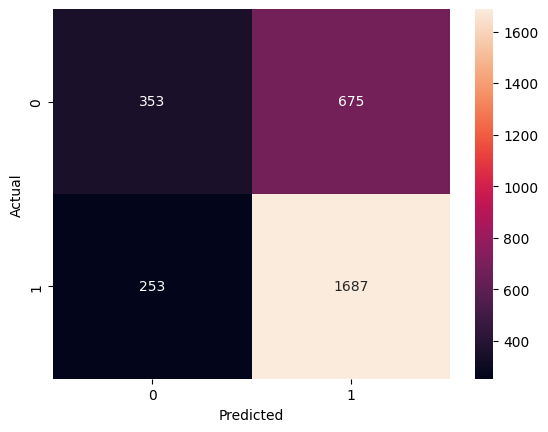

In [56]:
# {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}


xgboost = XGBClassifier( learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100)
xgboost.fit(x_train, y_train)

y_pred = xgboost.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Accuracy:  0.7975067385444744


Text(0.5, 23.52222222222222, 'Predicted')

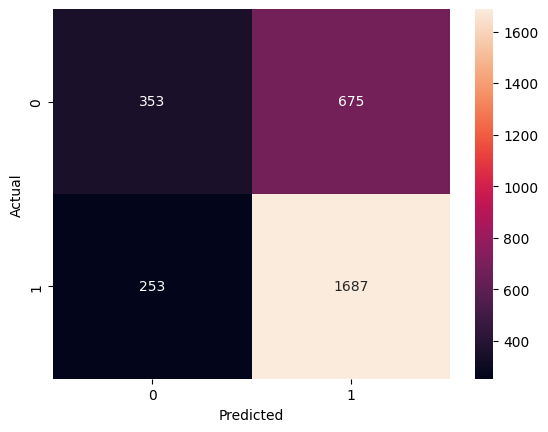

In [58]:
#{'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000}


xgboost2 = XGBClassifier( learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=1000)
xgboost2.fit(x_train2, y_train2)

y_pred2 = xgboost2.predict(x_test2)

print('Accuracy: ', accuracy_score(y_test2, y_pred2))

# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Logistic

Accuracy:  0.6873315363881402


c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 23.52222222222222, 'Predicted')

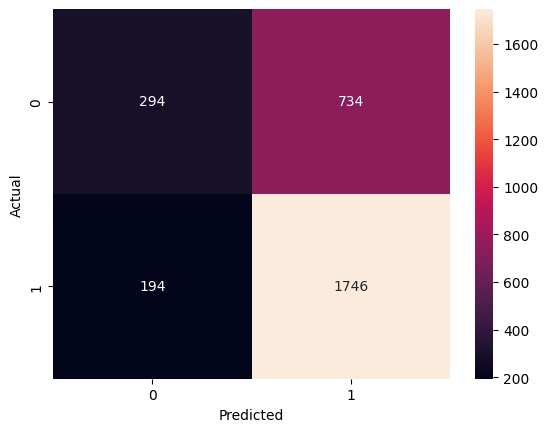

In [35]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
 
y_pred = logistic.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')


c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.7971698113207547


Text(0.5, 23.52222222222222, 'Predicted')

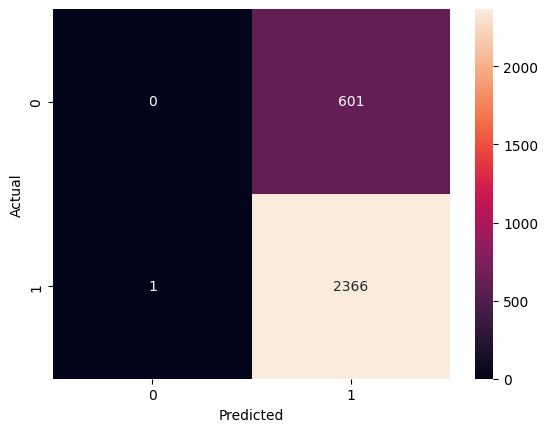

In [36]:
logistic2 = LogisticRegression()
logistic2.fit(x_train2, y_train2)

y_pred2 = logistic2.predict(x_test2)

print('Accuracy: ', accuracy_score(y_test2, y_pred2))
 
# Heatmap
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Test

In [57]:
test_data = pd.read_csv('test.csv')
id = test_data['id']
# optional z-score
#test_data = (test_data - test_data.mean()) / test_data.std()

In [59]:
y_pred1 = xgboost.predict(test_data)
y_pred2 = xgboost2.predict(test_data)

# Save to CSV
y_preds = pd.DataFrame({'EC1': y_pred1, 'EC2': y_pred2})
y_preds['id'] = id
y_preds.to_csv('submission4.csv', index=False)